## Forces in a cylindrical fibre
This file is a part of the project [ChiralForce](www.chiralforce.eu). The purpose of this document is to present the calculation of guided modes in a cylindrical fibre and calculate optical forces that they would excert on small dipole like particles. 

In [1]:
import fields

### Calculating the fields
We consider a cylindrical nonmagnetic medium of radius $r_0$, characterized by the permittivity and permeability, as
follows:
$$
\varepsilon=\left\{\begin{array}{ll}
\varepsilon_1, & \text { for } r<r_0 \\
\varepsilon_2, & \text { for } r>r_0
\end{array} \quad \text { and } \quad \mu=\mu_0\right..
$$
Eigenmodes of cylindrical waveguides are well studied, since they can be calculated analytically see for instance [PICARDI 2018](https://opg.optica.org/optica/fulltext.cfm?uri=optica-5-8-1016&id=396289). In the basis of circular polarizations attached to the transverse Cartesian coordinates $E^{ \pm}=\left(E_x \mp i E_y\right) / \sqrt{2}$, and for magnetic field $H^{ \pm}=\left(H_x \mp i H_y\right) / \sqrt{2}$ the solution inside the waveguide is of the form
$$
\begin{aligned}
\sqrt{\varepsilon}E^{ \pm} & =\frac{k B_\ell\mp\mathrm{i} \beta A_\ell}{\kappa}J_{\ell \mp 1}(\kappa r) e^{i(\ell \mp 1) \varphi+i \beta z}, &\sqrt{\varepsilon}E_z & =\sqrt{2} A_\ell J_{\ell}(\kappa r) e^{i \ell \varphi+i \beta z}\\
\sqrt{\mu} H^{ \pm} & =\frac{k A_\ell \mp \mathrm{i}\beta B_\ell}{\kappa} J_{\ell \mp 1}(\kappa r) e^{i(\ell \mp 1) \varphi+i \beta z},& \sqrt{\mu}H_z&=\sqrt{2} B_\ell J_{\ell}(\kappa r) e^{i \ell \varphi+i \beta z} ,
\end{aligned}
$$
where, $k$ is the wave number in the medium, $\beta>k_0$ is the mode propagation constant ($k_0$ is the wave number in vacuum), $\kappa=\sqrt{k^2-\beta^2}$ is the radial wave number, $\ell=0, \pm 1, \pm 2, \ldots$ is the azimuthal quantum number, and $J_\alpha(x)$ is the Bessel function of the first kind. The eigenmode fields outside the fiber can be found by employing substitution
$$
J_\alpha(\rho) \rightarrow H_\alpha^{(1)}(\rho), \quad(A_\ell, B_\ell) \rightarrow(C_\ell, D_\ell),
$$
where $H_\alpha^{(1)}(\rho)$ is the Hankel function, and the radial wave number becomes imaginary.
The values of the propagation constant $\beta$ for given other parameters ( $\omega, r_0$, etc.) are found from the transcendental characteristic equation, whereas the complex constants $A_\ell$, $B_\ell$ $C_\ell$ and $D_\ell$ are determined from the boundary conditions at $r=r_0$. These boundary conditions for $E_z$, $E_\phi$ and $H_z$, $H_\phi$ can be written as an eigenvalue problem $\boldsymbol{A}_\ell(\beta,\omega,r_0,n_1,n_2) \boldsymbol{v}_\ell=0$ with $\boldsymbol{v}_\ell=(A_\ell,B_\ell,C_\ell,D_\ell)$ and boundry condition matrix
$$\boldsymbol{A}_\ell(\beta,\omega,r_0,n_1,n_2)=
\left(\begin{array}{cccc}
n_2 J_{\ell} & 0 & - n_1H_{\ell}^{(1)} & 0 \\
n_2 \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} n_2 \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & - n_1\frac{\ell \beta}{\kappa_2^2 r_0} H_{\ell}^{(1)} & -\mathrm{i}  n_1\frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} \\
0 & J_{\ell} & 0 & -H_{\ell}^{(1)} \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} & -\frac{\ell \beta}{\kappa_2^2 r_0} H_l^{(1)}
\end{array}\right).
$$
If we fix refractive indices $n_1$ and $n_2$ it is possible to find $\beta(r_0/\lambda)$ or even better $n_\mathrm{eff}=\beta/k_0$ from $\det\boldsymbol{A}_\ell(\beta,\omega,r_0)=0$. Below you can choose parameters that will be used for this calculation

In [2]:
n_in = 1.45         # refractive index of the cylinder
n_out= 1.00         # refractive index of the surrounding medium
λ0 = 250e-9         # wavelength of the light in vacuum [m]
r0 = 0.32*λ0        # radius of cylinder [m]
ℓ  = 1              # angular momentum quantum number

#### Linear polarisation
Let us start by calculating the sum of modes with $\ell=1$ and $\ell=-1$, which will give the linear polarisation. Below you can see the function $n_\mathrm{eff}(k_0r_0)$ for this particular choice of refractive indices and for the $|\ell|=1$ that was calculated from the determinant of the boundary condition matrix, the highlighted point corresponds to the current choice of parameters.

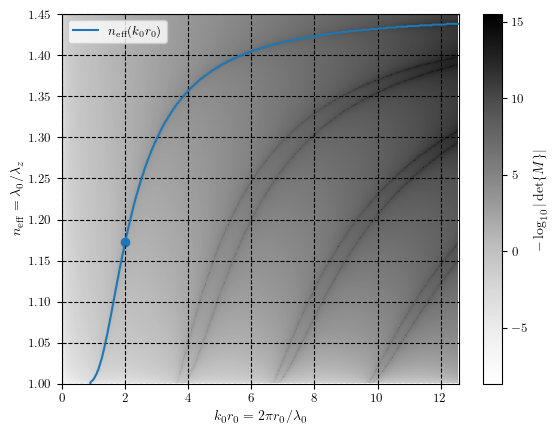

In [3]:
(ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,n_in,n_out,R=1,L=1,neff_fig=True,ℓ=ℓ) # generate E and H fields 

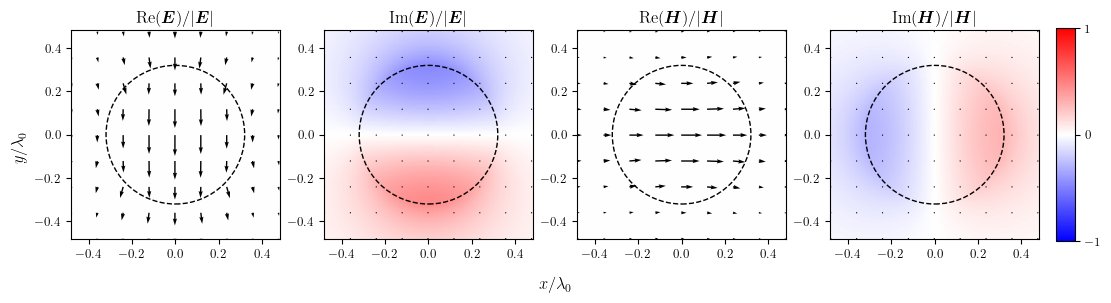

In [4]:
fields.plot_EH(r0,λ0,E,H,X,Y) # plot of the E and H fields for linearly polarized light

The total optical for can be written as sum of three parts $\boldsymbol{F}=\boldsymbol{F}_{\text {grad }}+\boldsymbol{F}_{\text {press }}+\boldsymbol{F}_{\text {recoil }}$. For a small isotropic particle these can be written in terms of just dipole polarisabilities and observables related to the electromagnetic wave,
$$
\begin{aligned}
\boldsymbol{F}_{\text {grad }}={}&\boldsymbol{\nabla}\!\left[\Re(\alpha_{\mathrm{e}}) W_{\mathrm{e}}+\Re(\alpha_{\mathrm{m}}) W_{\mathrm{m}}+\Re(\alpha_{\mathrm{c}}) W_{\mathrm{c}}+\Re(\alpha_{\mathrm{\chi}}) W_{\mathrm{\chi}}\right]\\
\boldsymbol{F}_{\text {press }}={}&2 \omega\!\left[\Im(\alpha_{\mathrm{e}})\boldsymbol{p}_{\mathrm{e}}+\Im(\alpha_{\mathrm{m}})\boldsymbol{p}_{\mathrm{m}}+\Im(\alpha_{\mathrm{c}})\boldsymbol{p}_{\mathrm{c}}+\Im(\alpha_{\mathrm{\chi}})\boldsymbol{p}_{\mathrm{\chi}}\right]\,,
\end{aligned}
$$
 where $W=W_{\mathrm{e}}+W_{\mathrm{m}}$ is energy density, $W_{\mathrm{c}}=\omega \mathfrak{S}$ is the helicity density $\mathfrak{S}$ in units of energy density, for non reciprocal particles $\alpha_{\mathrm{\chi}}\neq0$, there is also a measure of the angle between the electric and magnetic field $W_{\mathrm{\chi}}\propto\Re(\boldsymbol{E}^*\cdot\boldsymbol{H})$, momentum densities in pressure force are related to real and imaginary parts of the complex Poynting vector, $\boldsymbol{\Pi}$, and spin densities $\boldsymbol{S}$
$$
\boldsymbol{p}_{\mathrm{e,m}}=\frac{1}{2 c^2} \Re(\boldsymbol{\Pi})-\frac{1}{2} \boldsymbol{\nabla} \times \boldsymbol{S}_{\mathrm{e,m}}, \quad 
\boldsymbol{p}_{\mathrm{c}}=k \boldsymbol{S}-\frac{1}{2 \omega c} \boldsymbol{\nabla} \times \Re(\boldsymbol{\Pi}),\quad \boldsymbol{p}_\chi=-\frac{1}{2 \omega c} \boldsymbol{\nabla} \times \Im(\boldsymbol{\Pi})
$$

In particular if the particle is small enough that one can neglect the recoil, it is possible to think about these electromagnetic observables an 8 dimensional vector space basis with real and imaginary parts of polarisability as coefficients. For bigger particles the force will no longer be linear in polarisabilities and the recoil force will act as correction term
$$
\begin{aligned}
 \boldsymbol{F}_{\text {recoil }}={}&-\frac{k^4}{6 \pi c}\left[\Re(\alpha_{\mathrm{e}}^* \alpha_{\mathrm{m}}+\left|\alpha_{\mathrm{c}}\right|^2-\left|\alpha_\chi\right|^2) \Re(\boldsymbol{\Pi})+\Im(\alpha_{\mathrm{e}}^* \alpha_{\mathrm{m}}+2 \alpha_{\mathrm{c}}^* \alpha_\chi) \Im(\boldsymbol{\Pi})\right] \\
& -\frac{k^4}{3 \pi} \omega\left[(\Re(\alpha_{\mathrm{c}}^* \alpha_{\mathrm{e}})-\Im(\alpha_\chi^* \alpha_{\mathrm{e}})) \boldsymbol{S}_{\mathrm{e}}+(\Re(\alpha_{\mathrm{c}}^* \alpha_{\mathrm{m}})-\Im(\alpha_\chi^* \alpha_{\mathrm{m}})) \boldsymbol{S}_{\mathrm{m}}\right]\,.
\end{aligned}
$$




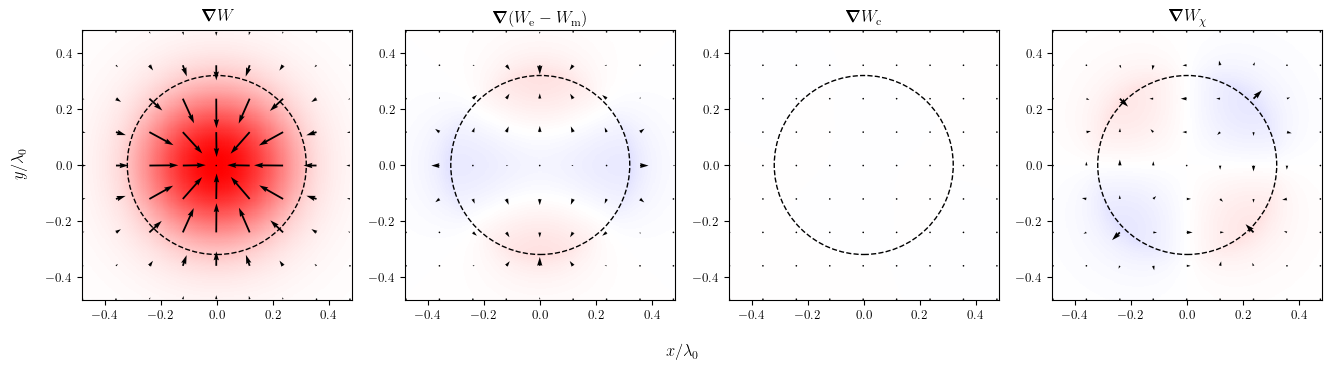

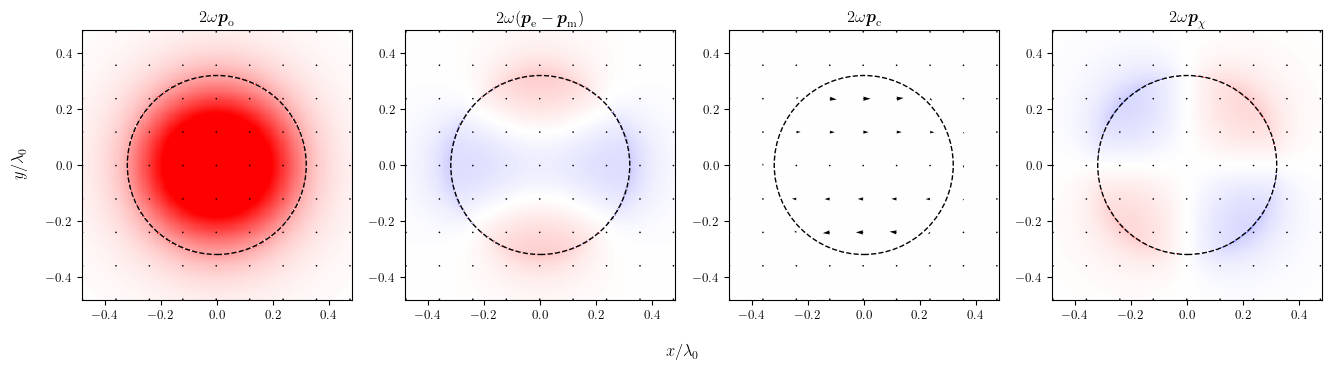

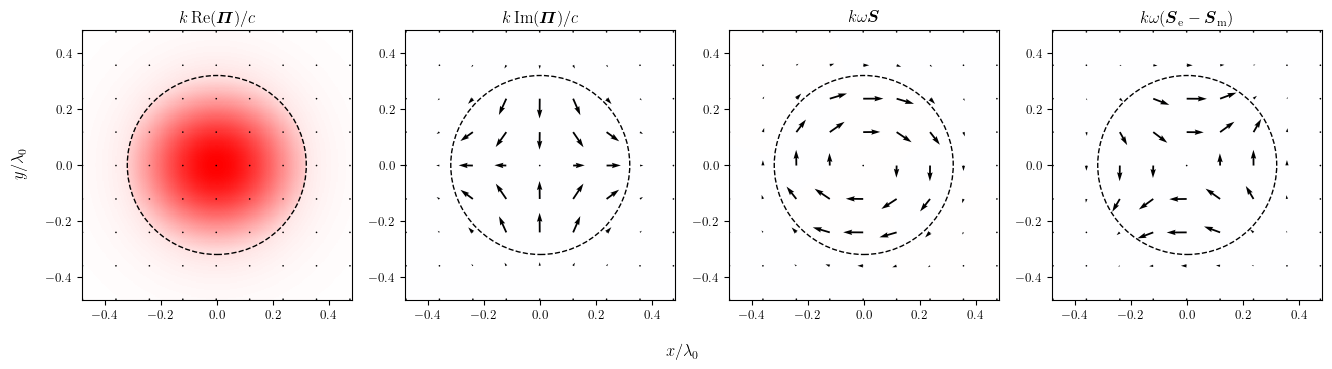

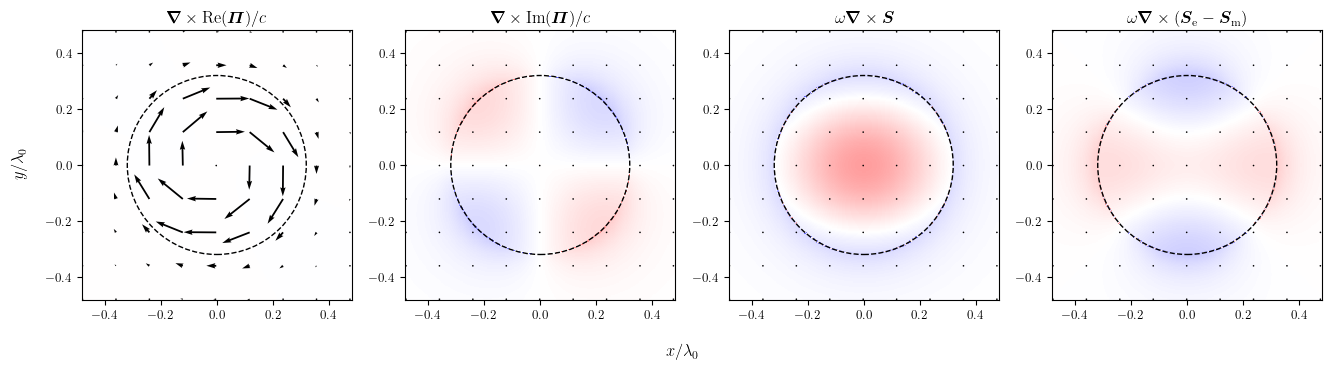

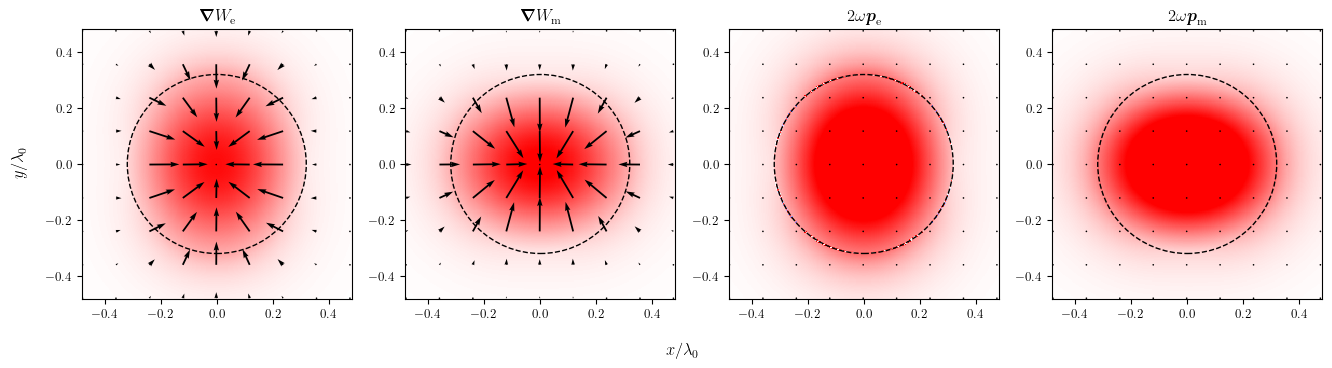

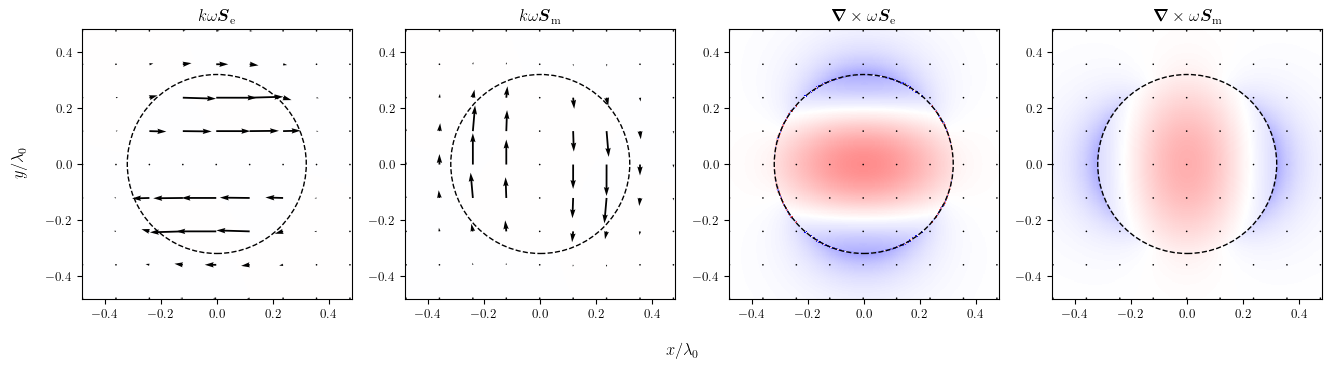

In [5]:
arrows=8
(Wt,ΔW,Wc,Wr,grad_Wt,grad_ΔW,grad_Wc,grad_Wr,ωpt,ωΔp,ωpc,ωpr,Re_Π,Im_Π,ωSt,ωΔS)=fields.observables(λ0,ϵ,E,μ,H,X,Y,Z)
fields.plot_forces(r0,λ0,ϵ,μ,Wt,ΔW,Wc,Wr,grad_Wt,grad_ΔW,grad_Wc,grad_Wr,ωpt,ωΔp,ωpc,ωpr,Re_Π,Im_Π,ωSt,ωΔS,X,Y,Z,w=3,arrows=arrows)

#### Circular polarisation

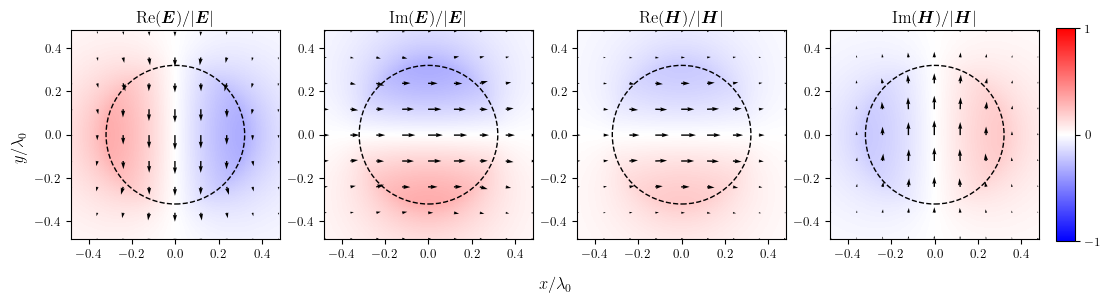

In [6]:
(ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,n_in,n_out,R=1,L=0,ℓ=ℓ) 
fields.plot_EH(r0,λ0,E,H,X,Y)

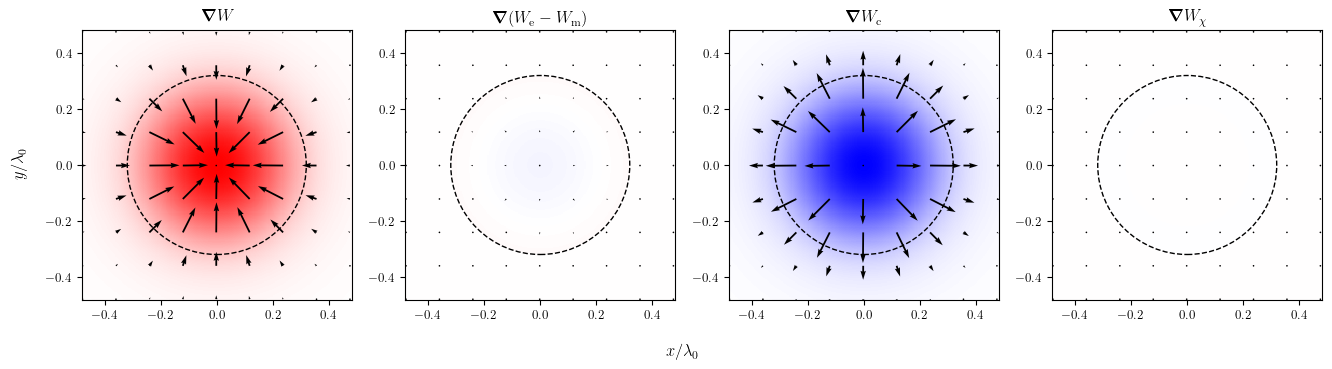

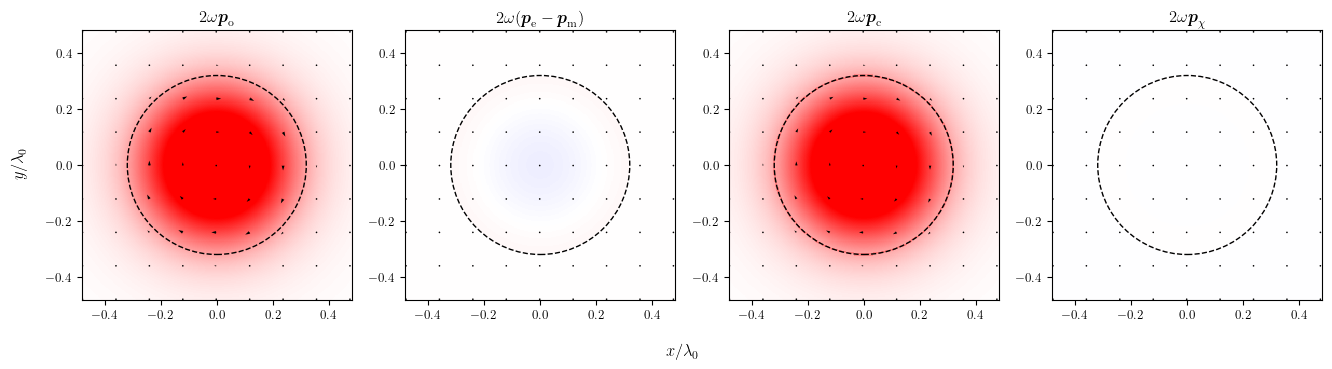

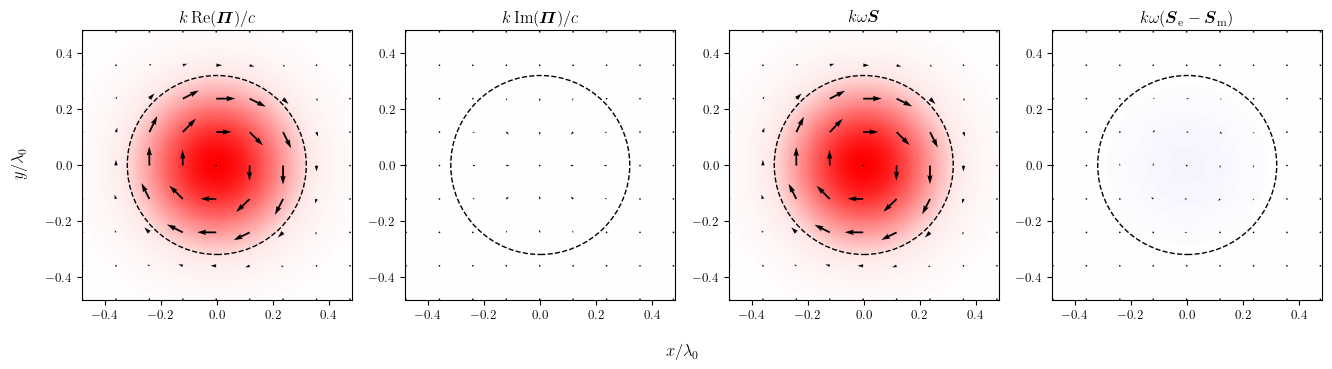

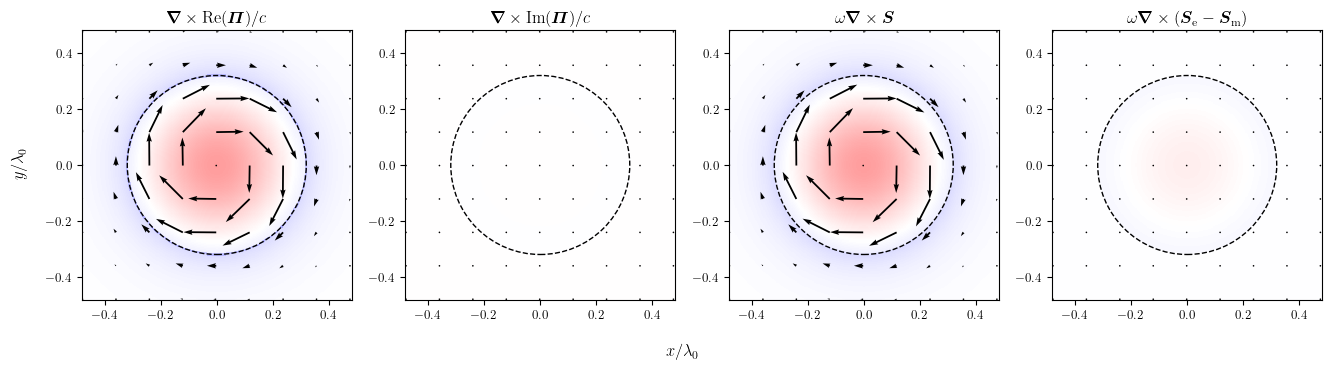

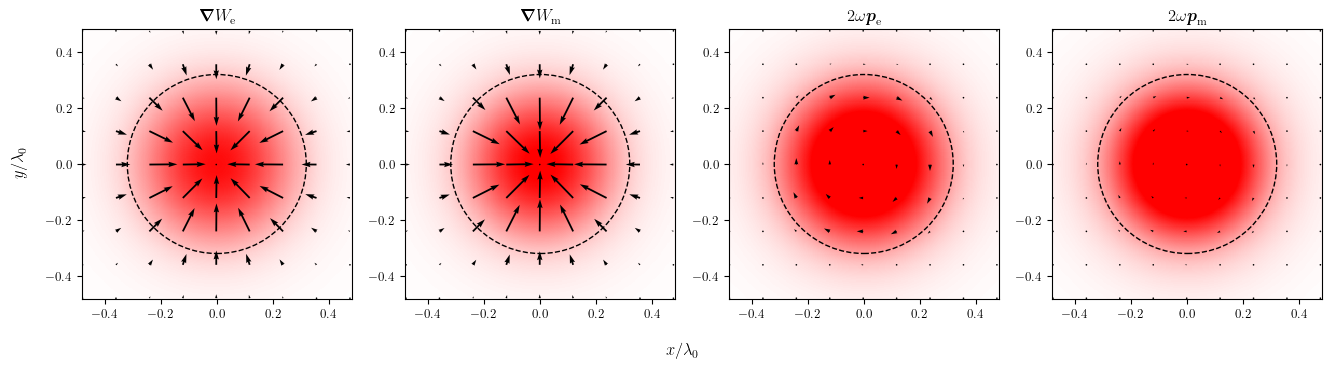

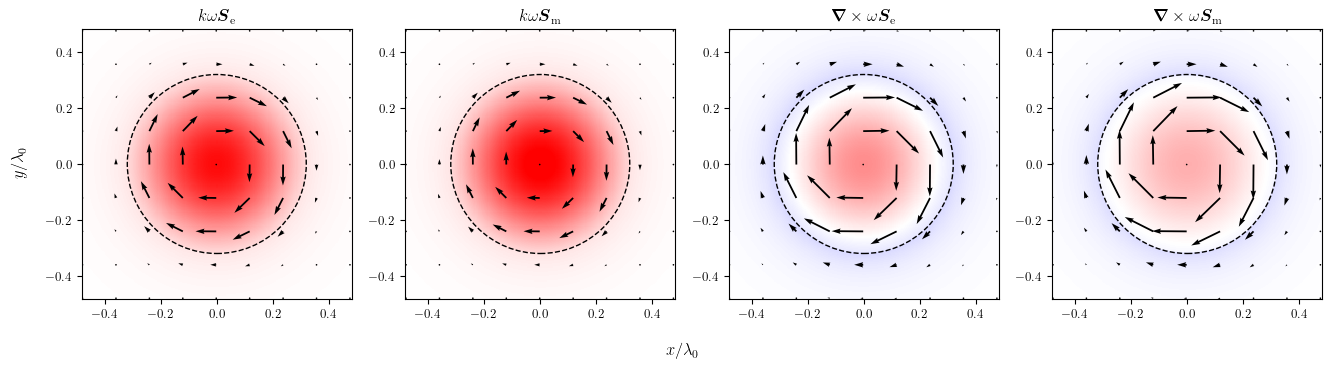

In [7]:
(Wt,ΔW,Wc,Wr,grad_Wt,grad_ΔW,grad_Wc,grad_Wr,ωpt,ωΔp,ωpc,ωpr,Re_Π,Im_Π,ωSt,ωΔS)=fields.observables(λ0,ϵ,E,μ,H,X,Y,Z)
fields.plot_forces(r0,λ0,ϵ,μ,Wt,ΔW,Wc,Wr,grad_Wt,grad_ΔW,grad_Wc,grad_Wr,ωpt,ωΔp,ωpc,ωpr,Re_Π,Im_Π,ωSt,ωΔS,X,Y,Z,w=6,arrows=arrows)

## Dependence on the radius of the fibre
The magnitude of each component of the force will depend on how big the fibre is with respect to the wavelength used. Below we present maximum magnitude of each force force density (in units of fN/(mWÅ³)), where solid line reprÚesents transversal direction and dashed line represents longitudinal components. To get the final force one needs to also multiply the polarisability in units Å³.

In [8]:
inside=False;k0r0min=1.5;k0r0max=8

  0%|          | 0/100 [00:00<?, ?it/s]

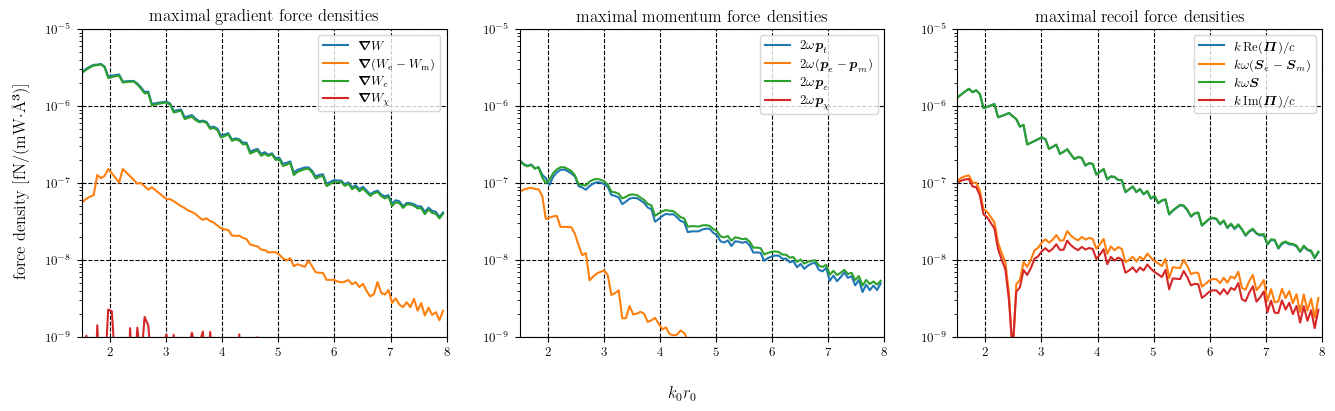

RuntimeError: latex was not able to process the following string:
b'$force density [fN/(mW\\xb7\\xc5\\xb3)]'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpcmm3y_ef 945be1273d7236572028c822c1346677.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./945be1273d7236572028c822c1346677.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/physics/physics.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/siunitx/siunitx.sty
(/usr/share/texlive/texmf-dist/tex/latex/translations/translations.sty
(/usr/share/texlive/texmf-dist/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texlive/texmf-dist/tex/generic/pdftexcmds/pdftexcmds.sty
(/usr/share/texlive/texmf-dist/tex/generic/infwarerr/infwarerr.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/l3keys2e/l3keys2e.sty)

Package siunitx Warning: Detected the "physics" package:
(siunitx)                Omitting definition of \qty.

(/usr/share/texlive/texmf-dist/tex/latex/tools/array.sty))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
No file 945be1273d7236572028c822c1346677.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/graphics/color.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/dvips.def)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/dvipsnam.def))
(/usr/share/texlive/texmf-dist/tex/latex/translations/translations-basic-dictio
nary-english.trsl)

LaTeX Warning: Command \textperiodcentered invalid in math mode on input line 3
0.


LaTeX Warning: Command \textperiodcentered invalid in math mode on input line 3
0.


LaTeX Warning: Command \r invalid in math mode on input line 30.


LaTeX Warning: Command \textthreesuperior invalid in math mode on input line 30
.


LaTeX Warning: Command \textthreesuperior invalid in math mode on input line 30
.

! Extra }, or forgotten $.
l.30 {\rmfamily $force density [fN/(mW·Å³)]}
                                               %
No pages of output.
Transcript written on tmpcmm3y_ef/945be1273d7236572028c822c1346677.log.




<Figure size 1400x400 with 2 Axes>

In [9]:
fields.plot_max_forces(λ0,R=1,L=0,k0r0min=k0r0min,k0r0max=k0r0max,N=500,resolution=250/3,samples=100,ℓ=1,zix=0,inside=inside)

  0%|          | 0/100 [00:00<?, ?it/s]

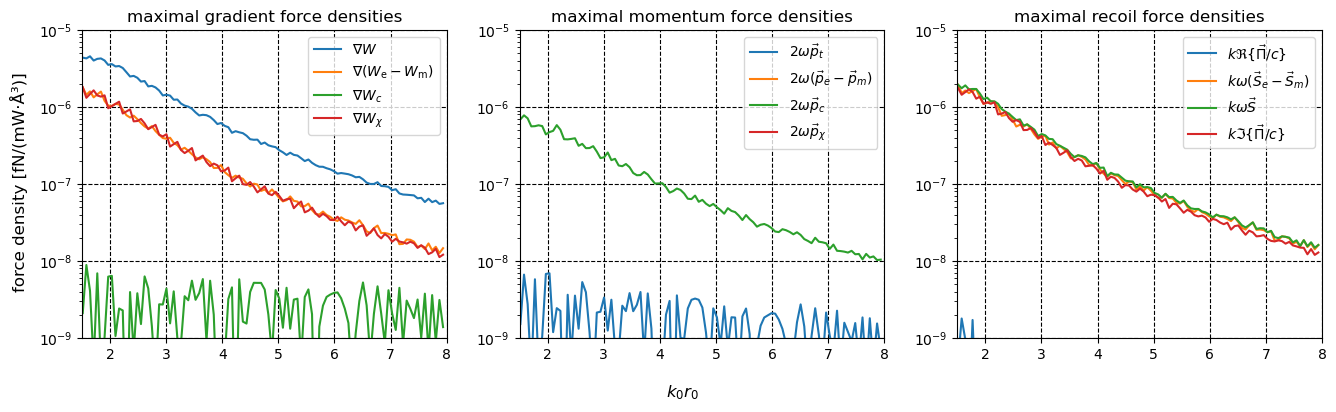

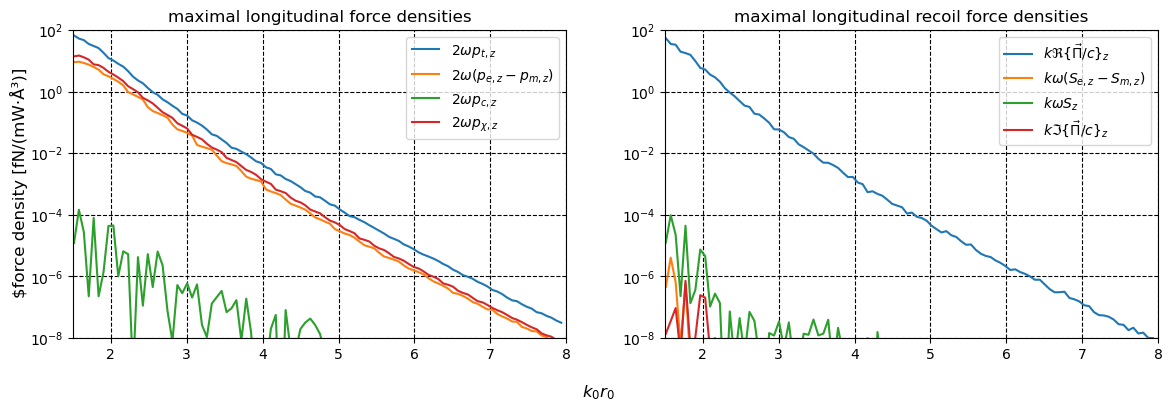

In [ ]:
fields.plot_max_forces(λ0,R=1,L=1,k0r0min=k0r0min,k0r0max=k0r0max,N=500,resolution=250/3,samples=100,ℓ=1,zix=0,inside=inside,window=2,plot_all=False)

  0%|          | 0/100 [00:00<?, ?it/s]

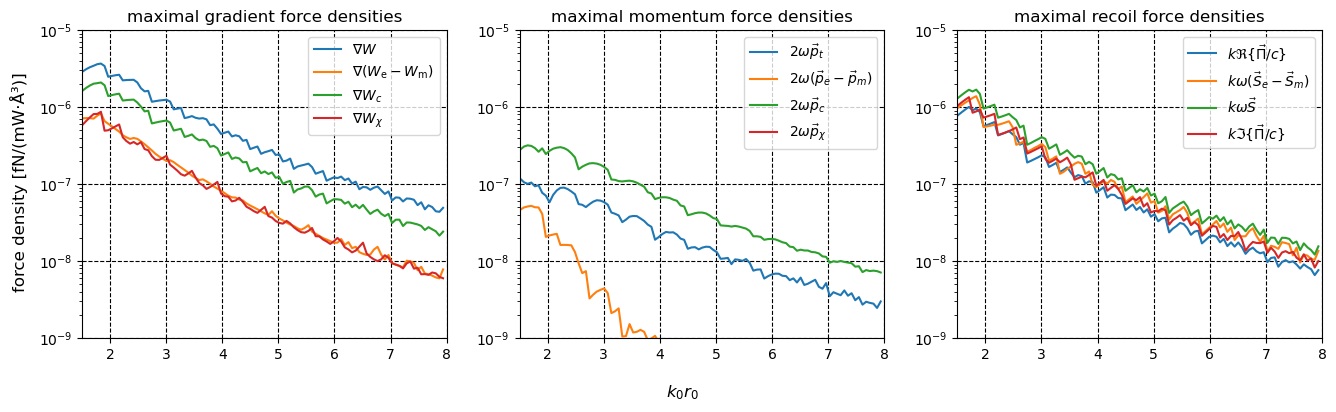

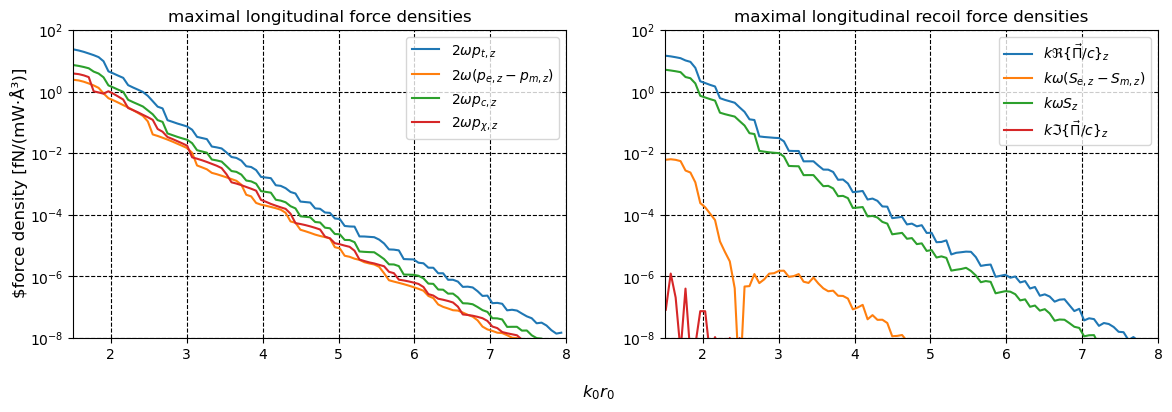

In [ ]:
fields.plot_max_forces(λ0,R=1,L=.5,k0r0min=k0r0min,k0r0max=k0r0max,N=500,resolution=250/3,samples=100,ℓ=1,zix=0,inside=inside)

In [ ]:
# _=fields.get_neff(rmin=-2,rmax=-.57,N=500,neff_fig=True,r0_over_λ0=None,ℓ=1)
# _=fields.get_neff(rmin=0,rmax=2,N=500,neff_fig=True,r0_over_λ0=None,ℓ=1)